In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import pickle as pkl

## Chip/Clip supp plot

In [2]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/chip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
total_df = total_df.replace({'NT 10 CNN': 'NT'})
total_df = total_df.replace({'sei': 'SEI'})
total_df = total_df.replace({'CNN': 'One-hot'})

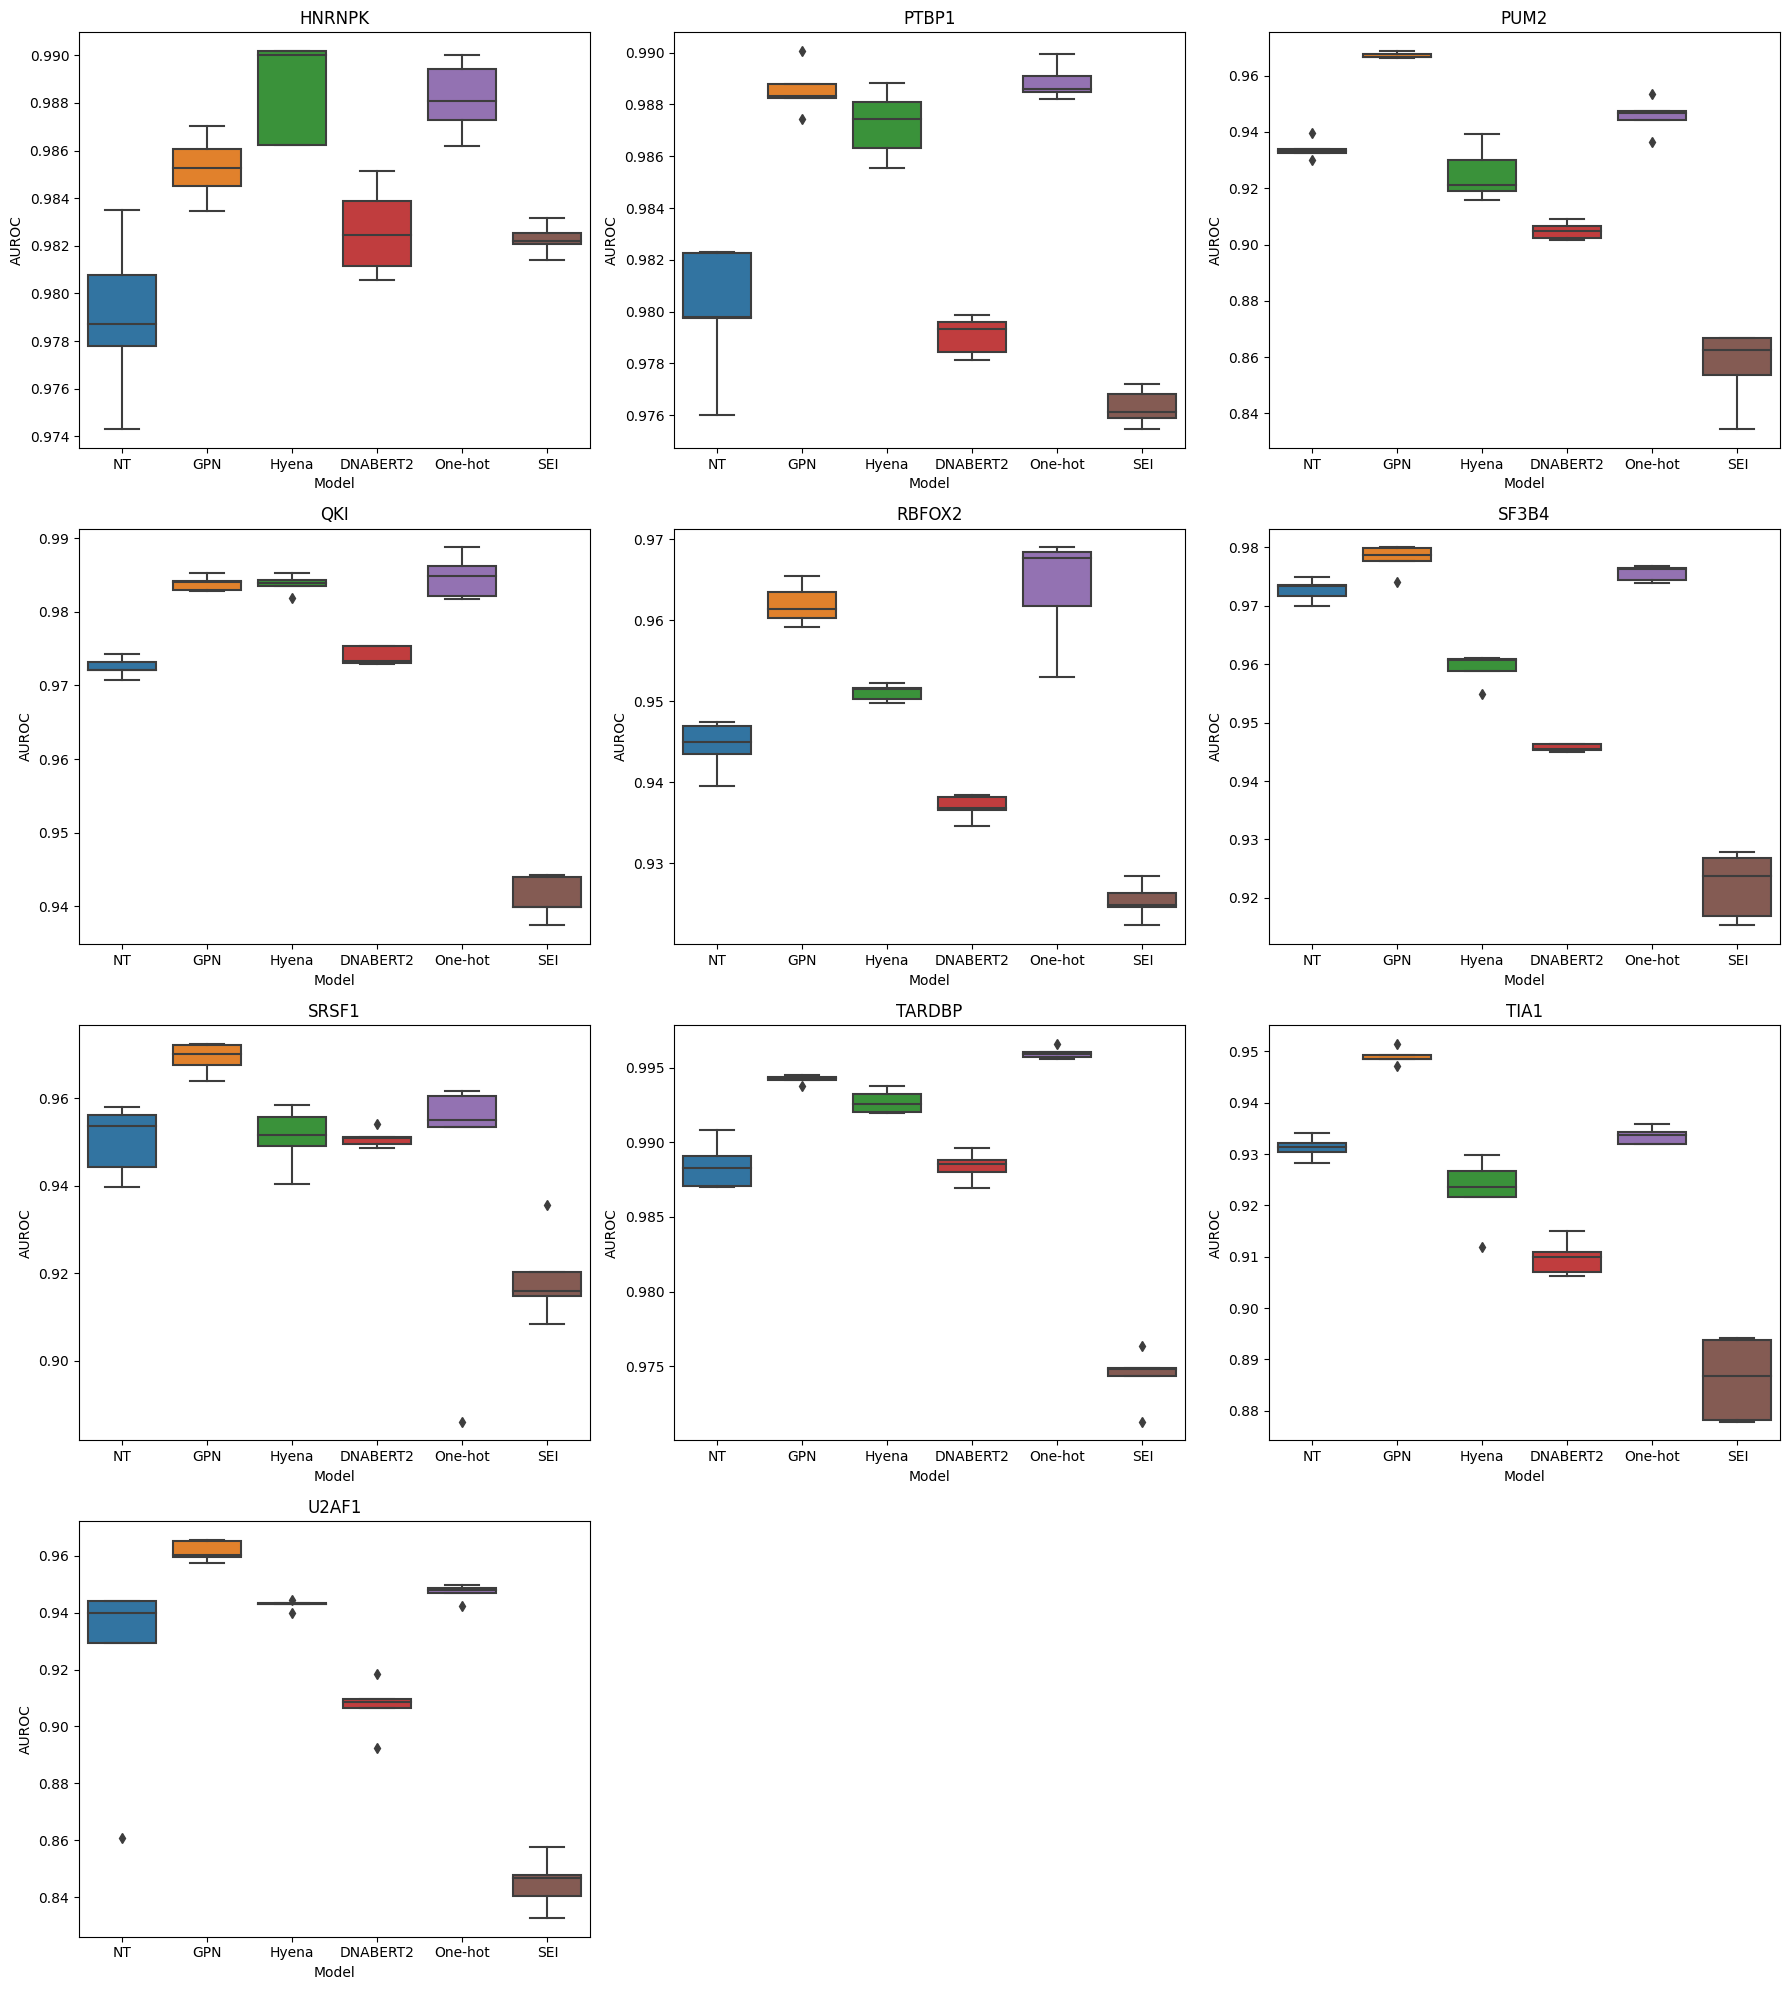

In [26]:
fig,axs = plt.subplots(4,3,figsize=(18,20))
i = 0
for exp in total_df['TF'].unique():
    sub_df = total_df[total_df['TF'] == exp]
    ax = axs[i//3,i%3]
    sns.boxplot(sub_df,x = 'Model', y = 'AUROC',order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI'],ax = ax )
    ax.set_ylabel('AUROC');
    ax.set_title(exp)
    # plt.xlabel('');
    i+=1
axs[-1, -1].remove()
axs[-1, -2].remove()
plt.tight_layout()

In [20]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/eclip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
total_df = total_df.replace({'NT 10 CNN': 'NT'})
total_df = total_df.replace({'sei': 'SEI'})
total_df = total_df.replace({'CNN': 'One-hot'})

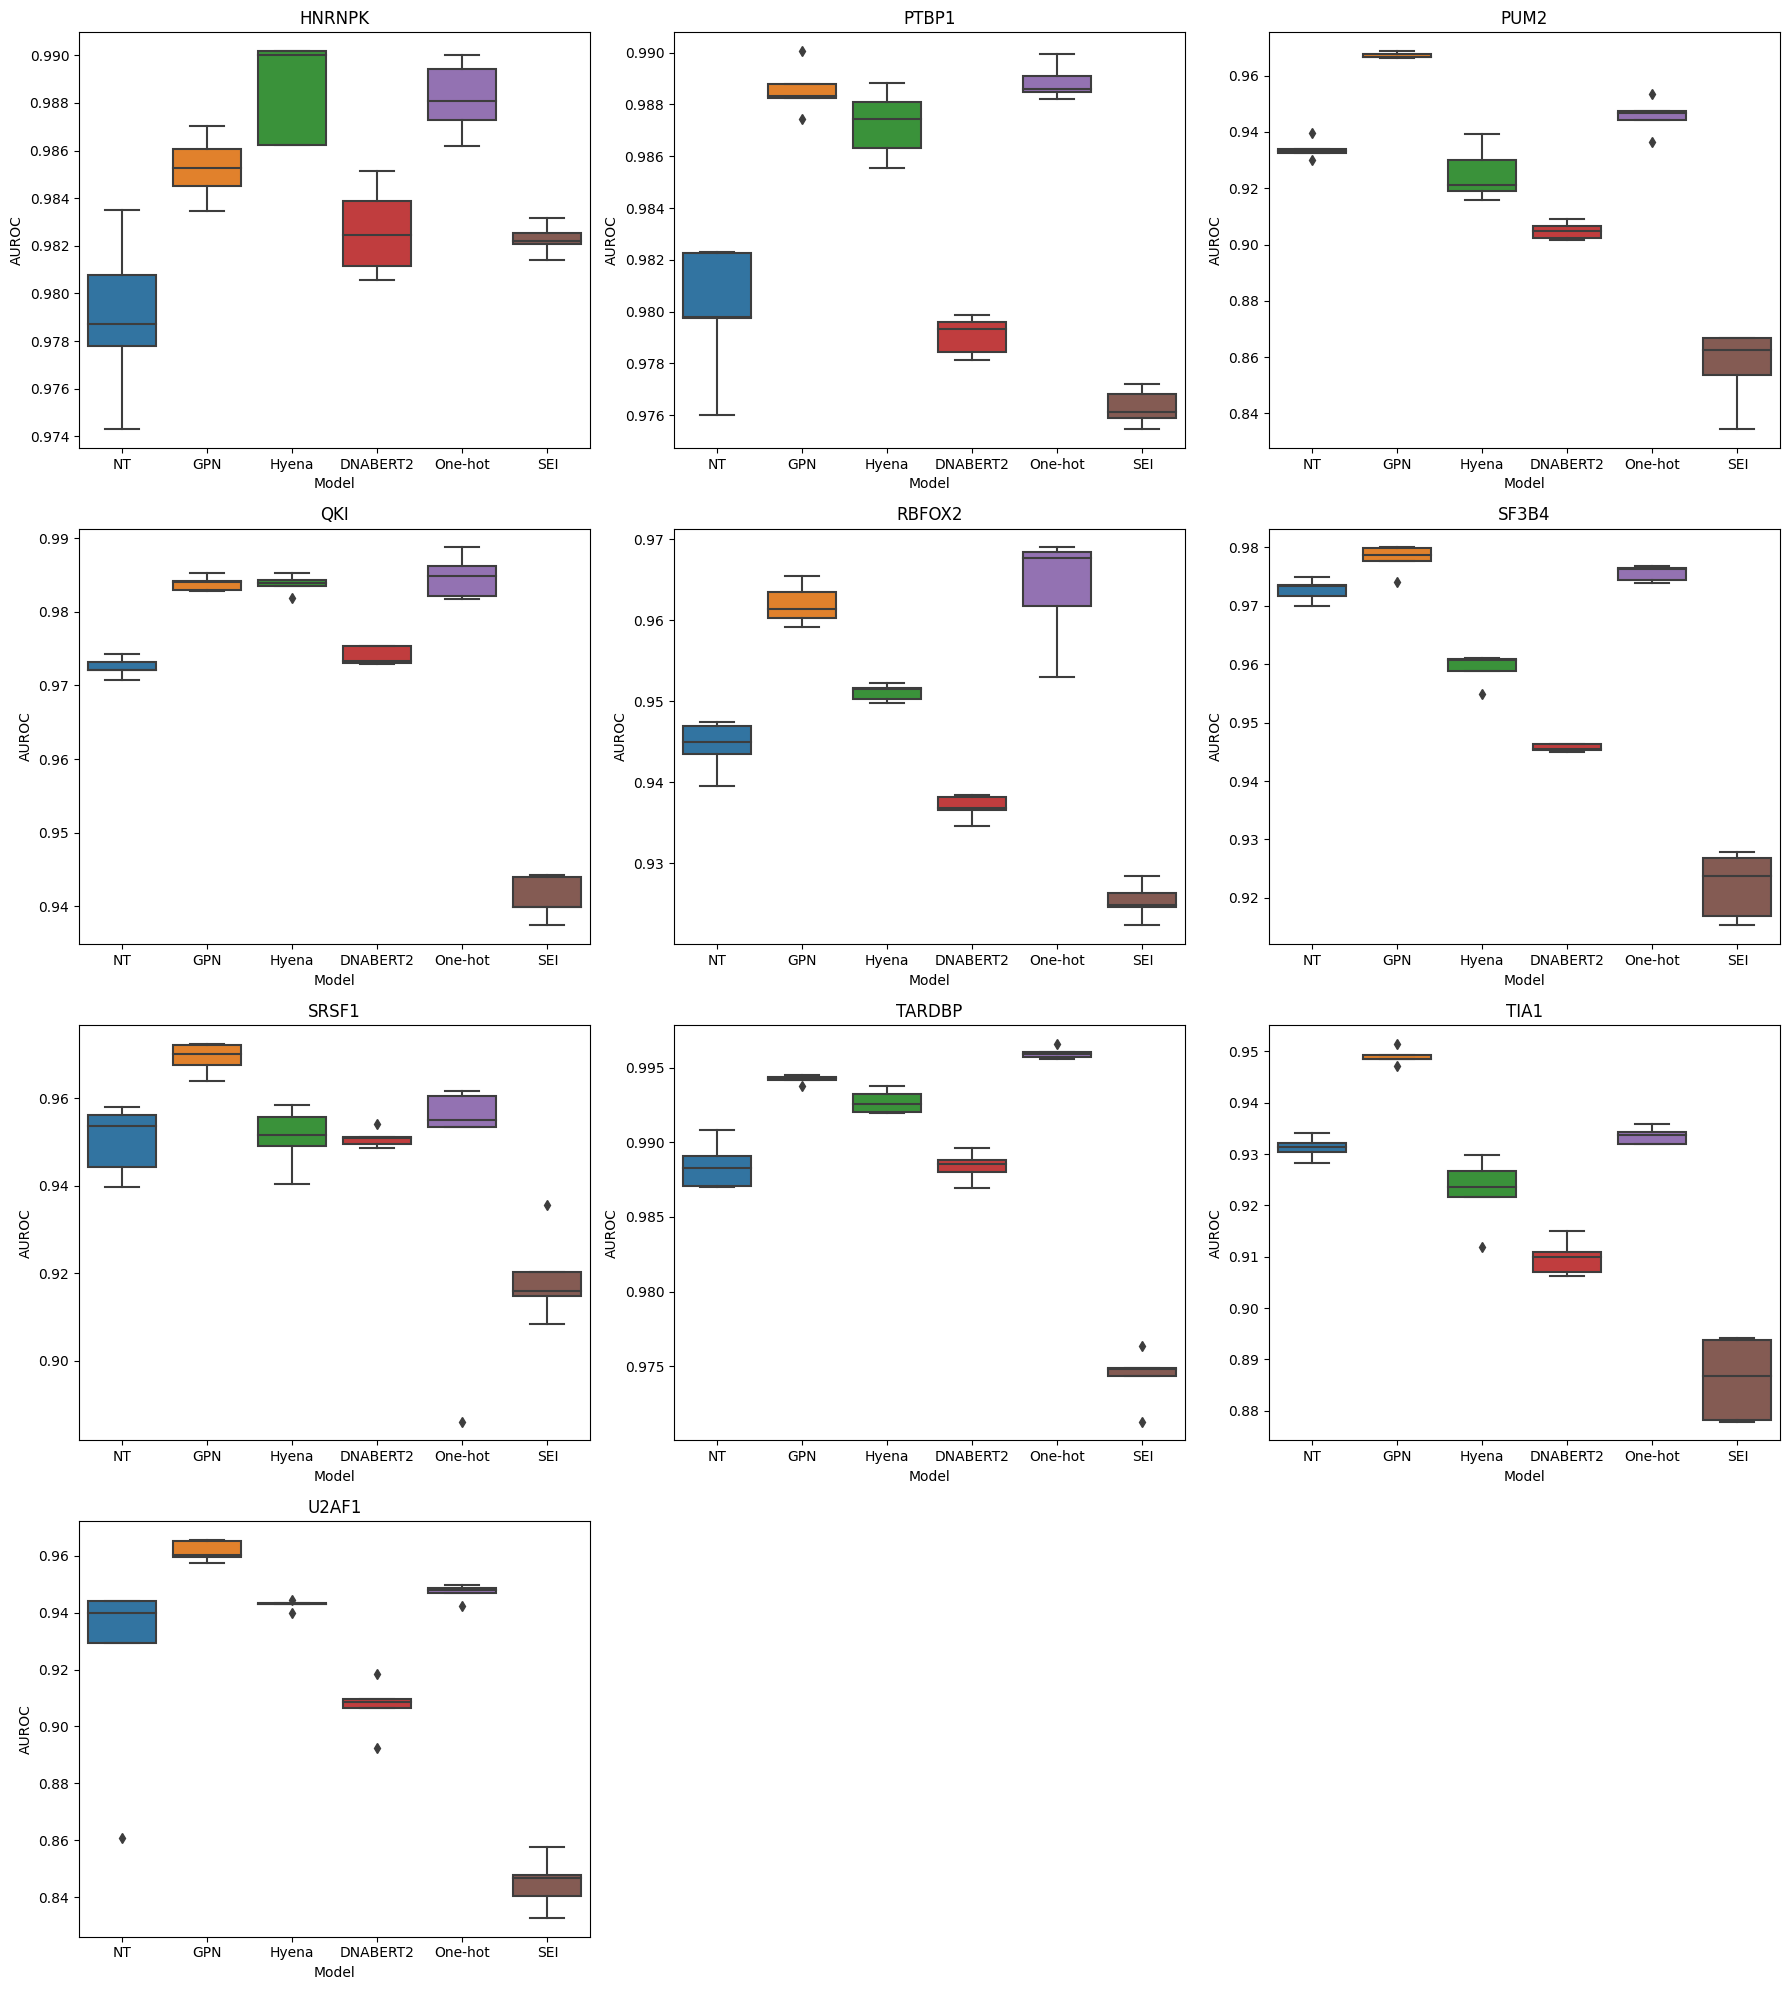

In [24]:
fig,axs = plt.subplots(4,3,figsize=(18,20))
i = 0
for exp in total_df['TF'].unique():
    sub_df = total_df[total_df['TF'] == exp]
    ax = axs[i//3,i%3]
    sns.boxplot(sub_df,x = 'Model', y = 'AUROC',order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI'],ax = ax )
    ax.set_ylabel('AUROC');
    ax.set_title(exp)
    i+=1
axs[-1, -1].remove()
axs[-1, -2].remove()
plt.tight_layout()

## Sub-sample exp

In [11]:
import pickle as pkl
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [12]:
df1 = pd.DataFrame()
for file in glob.glob('../RNAenlong/result/*.pkl'):
    with open(file, "rb") as input_file:
        df = pkl.load(input_file)
        df1 = pd.concat((df1,df),ignore_index=True)
    

In [13]:
x = np.unique(df1['Data Ratio'])

In [14]:
models = np.unique(df1['Input Data'])

results = {}
results2 = {}
for name in models:
    entry = df1[df1['Input Data'] == name]
        
    mean = []
    std = []
    for val in x:
        tmp_df = entry[entry['Data Ratio'] == val]
        tmp = np.array(tmp_df['Prediction Pearson R'])
        mean.append(np.mean(tmp))
        std.append(np.std(tmp))
    results[name] = np.array(mean)
    results2[name] = np.array(std)/np.sqrt(5)
    
results.keys()



dict_keys(['2B5_1000G_embed', '2B5_1000G_embed_l10', 'dnabert_embed', 'gpn_human_embed', 'hyena_embed', 'insert_dataset', 'rbp_embed', 'sei_embed'])

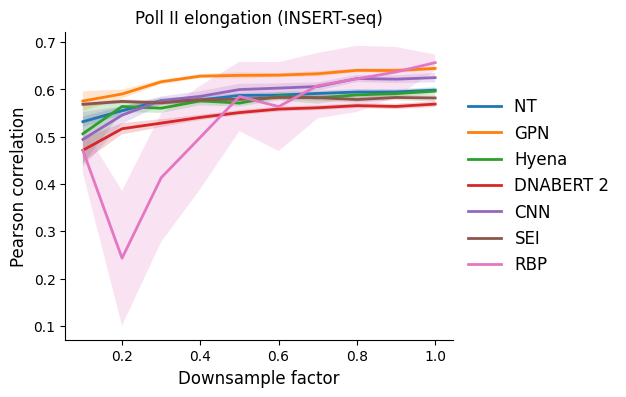

In [15]:
fontsize=12

fig, ax = plt.subplots(figsize=(5,4))

l1, = plt.plot(x, results['2B5_1000G_embed_l10'], linewidth=2)
plt.fill_between(x, results['2B5_1000G_embed_l10']-results2['2B5_1000G_embed_l10'], results['2B5_1000G_embed_l10']+results2['2B5_1000G_embed_l10'], alpha=0.2)

l2, =plt.plot(x, results['gpn_human_embed'], linewidth=2)
plt.fill_between(x, results['gpn_human_embed']-results2['gpn_human_embed'], results['gpn_human_embed']+results2['gpn_human_embed'], alpha=0.2)

l3, =plt.plot(x, results['hyena_embed'], linewidth=2)
plt.fill_between(x, results['hyena_embed']-results2['hyena_embed'], results['hyena_embed']+results2['hyena_embed'], alpha=0.2)

l4, =plt.plot(x, results['dnabert_embed'], linewidth=2)
plt.fill_between(x, results['dnabert_embed']-results2['dnabert_embed'], results['dnabert_embed']+results2['dnabert_embed'], alpha=0.2)

l5, =plt.plot(x, results['insert_dataset'], linewidth=2)
plt.fill_between(x, results['insert_dataset']-results2['insert_dataset'], results['insert_dataset']+results2['insert_dataset'], alpha=0.2)

l6, =plt.plot(x, results['sei_embed'], linewidth=2)
plt.fill_between(x, results['sei_embed']-results2['sei_embed'], results['sei_embed']+results2['sei_embed'], alpha=0.2)

l7, =plt.plot(x, results['rbp_embed'], linewidth=2)
plt.fill_between(x, results['rbp_embed']-results2['rbp_embed'], results['rbp_embed']+results2['rbp_embed'], alpha=0.2)



#plt.plot([x[0],x[-1]], [0.7725, 0.7725],'--', linewidth=2)
#plt.text(33,0.7725,'Onehot Residual')


legend_name = [
               'NT ',
               'GPN',
               'Hyena',
               'DNABERT 2',
               'CNN',
               'SEI',
               'RBP',
              ]

plt.legend([l1,l2,l3,l4,l5,l6,l7],legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.yticks([0.5, 0.55, 0.6, 0.65], fontsize=fontsize )
# plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=fontsize)
#plt.setp(ax.get_yticklabels(), fontsize=fontsize)
#plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Downsample factor', fontsize=fontsize)
plt.ylabel("Pearson correlation", fontsize=fontsize)
plt.title('Poll II elongation (INSERT-seq)', fontsize=fontsize)
fig.savefig('stability.pdf', format='pdf', dpi=200, bbox_inches='tight')

## MT-Splice

In [16]:
df1 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df1 = pd.concat((df1,mean_df),ignore_index=True)
df1['Downsample factor'] = '1.0'

df5 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/0.5/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df5 = pd.concat((df5,mean_df),ignore_index=True)
df5['Downsample factor'] = '0.5'

df25 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/0.25/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df25 = pd.concat((df25,mean_df),ignore_index=True)
df25['Downsample factor'] = '0.25'
total_df = pd.concat((df1,df5,df25),ignore_index=True)
total_df.rename(columns={0:'Spearman rho'}, inplace=True)

In [17]:
x = np.unique(total_df['Downsample factor'])


In [18]:
models = np.unique(total_df['Model'])
results = {}
results2 = {}
for name in models:
    entry = total_df[total_df['Model'] == name]
        
    mean = []
    std = []
    for val in x:
        tmp_df = entry[entry['Downsample factor'] == val]
        tmp = np.array(tmp_df['Spearman rho'])
        mean.append(np.mean(tmp))
        std.append(np.std(tmp))
    results[name] = np.array(mean)
    results2[name] = np.array(std)/np.sqrt(5)
    
results.keys()



dict_keys(['CNN', 'DNABERT', 'GPN', 'Hyena', 'NT10_CNN', 'NT32_CNN', 'rbp', 'sei'])

In [19]:
results

{'CNN': array([0.25232209, 0.25078883, 0.30426482]),
 'DNABERT': array([0.1627446 , 0.17472794, 0.21126021]),
 'GPN': array([0.2433151 , 0.26358309, 0.28582111]),
 'Hyena': array([0.23083626, 0.24753553, 0.27010179]),
 'NT10_CNN': array([0.23324858, 0.25927453, 0.27449989]),
 'NT32_CNN': array([0.22735198, 0.25732598, 0.26352414]),
 'rbp': array([0.23908765, 0.26004552, 0.2885265 ]),
 'sei': array([0.04241463, 0.12847837, 0.2207997 ])}

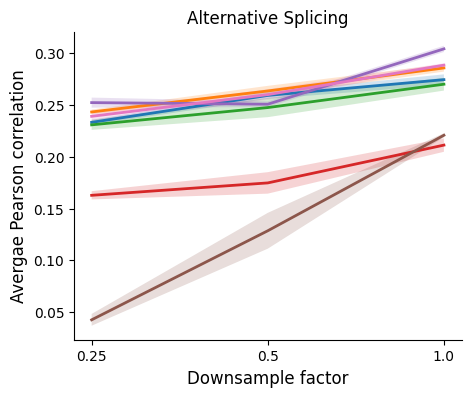

In [20]:
fontsize=12

fig, ax = plt.subplots(figsize=(5,4))

l1, =plt.plot(x, results['NT10_CNN'], linewidth=2)
plt.fill_between(x, results['NT10_CNN']-results2['NT10_CNN'], results['NT10_CNN']+results2['NT10_CNN'], alpha=0.2)

l2, =plt.plot(x, results['GPN'], linewidth=2)
plt.fill_between(x, results['GPN']-results2['GPN'], results['GPN']+results2['GPN'], alpha=0.2)

l3, =plt.plot(x, results['Hyena'], linewidth=2)
plt.fill_between(x, results['Hyena']-results2['Hyena'], results['Hyena']+results2['Hyena'], alpha=0.2)

l4, = plt.plot(x, results['DNABERT'], linewidth=2)
plt.fill_between(x, results['DNABERT']-results2['DNABERT'], results['DNABERT']+results2['DNABERT'], alpha=0.2)

l5, = plt.plot(x, results['CNN'], linewidth=2)
plt.fill_between(x, results['CNN']-results2['CNN'], results['CNN']+results2['CNN'], alpha=0.2)

l6, =plt.plot(x, results['sei'], linewidth=2)
plt.fill_between(x, results['sei']-results2['sei'], results['sei']+results2['sei'], alpha=0.2)

l7, =plt.plot(x, results['rbp'], linewidth=2)
plt.fill_between(x, results['rbp']-results2['rbp'], results['rbp']+results2['rbp'], alpha=0.2)

#plt.text(33,0.7725,'Onehot Residual')


#legend_name = ['CNN', 'DNABERT', 'GPN', 'Hyena', 'NT10_CNN', 'NT32_CNN', 'rbp', 'sei']

#plt.legend([l1,l2,l3,l4,l5,l6,l7,l8],legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.yticks([0.5, 0.55, 0.6, 0.65], fontsize=fontsize )
# plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=fontsize)
#plt.setp(ax.get_yticklabels(), fontsize=fontsize)
#plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Downsample factor', fontsize=fontsize)
plt.ylabel("Avergae Pearson correlation", fontsize=fontsize)
plt.title('Alternative Splicing', fontsize=fontsize)
fig.savefig('stability.pdf', format='pdf', dpi=200, bbox_inches='tight')